In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = r"C:\Users\vamsi\Downloads\titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#print dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
#missing values check
print("missing values check:\n ", df.isnull().sum())

missing values check:
  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\vamsi\AppData\Local\Temp\ipykernel_20696\41626528.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Not Survived", "Survived"])


Text(0.5, 1.0, 'Survival Count')

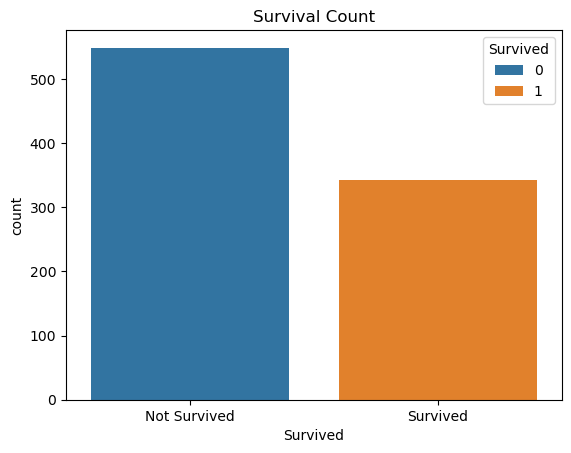

In [6]:
#survive rate visualizations
ax = sns.countplot(x='Survived', data=df, hue='Survived')
ax.set_xticklabels(["Not Survived", "Survived"])
plt.title('Survival Count')

In [14]:
import ollama

def generate_insights(df_summary):
    response = ollama.chat(model = 'mistral', messages = [{'role': 'user', 'content': f"Analyse the dataset summary and provide insights:{df_summary}"}])
    return response['message']['content']

#Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print(insights)

 Title: Analysis of the Titanic Dataset

Insights:

1. The dataset contains 891 records, all of which are unique as indicated by the count for each feature being equal to 891.

2. The mean age of passengers is approximately 29.69 years. However, the standard deviation (14.53) indicates a wide range of ages in the dataset.

3. Most passengers were traveling in Second Class (mean Pclass is 2.31), followed by Third Class (mean Parch and SibSp are both close to 0.4).

4. The mean Fare is approximately $32.20, with a standard deviation of $49.69, suggesting significant variability in ticket prices.

5. The minimum values for all numerical features (Age, Fare, Parch, SibSp) are 0, which could indicate missing or incomplete data.

6. The median Age is 28, and the median Survived column value is 0, indicating most passengers did not survive. The 75th percentile for Age is 38, suggesting a significant number of older passengers were also on board.

7. The maximum value for each feature is equal

In [15]:
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider","checkbox"],
    outputs=["text"],
)

demo.launch()


c:\Users\vamsi\anaconda3\Lib\site-packages\gradio\utils.py:1024: UserWarning: Expected 2 arguments for function <function greet at 0x000001FF5C9BC180>, received 3.
  warnings.warn(
c:\Users\vamsi\anaconda3\Lib\site-packages\gradio\utils.py:1032: UserWarning: Expected maximum 2 arguments for function <function greet at 0x000001FF5C9BC180>, received 3.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [19]:
pip install --upgrade gradio

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade gradio pydantic

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gradio as gr
import pandas as pd
import ollama

def generate_insights(df_summary):
    response = ollama.chat(model = 'mistral', messages = [{'role': 'user', 'content': f"Analyse the dataset summary and provide insights:{df_summary}"}])
    return response['message']['content']

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

#create web interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs= "text", title='AI-Powered EDA with Mistral')

#Launch app
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://c91651a90f642f2844.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [7]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ollama

#AI powered insights
def generate_ai_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights: {df_summary}"
    response = ollama.chat(model='mistral', messages= [{'role': 'user', 'content': prompt}])
    return response['message']['content']

#Function to Generate Data Visualizations
def generate_visualizations(df):

    plot_paths = []

    #1. Histograms for numeric columns
    for col in  df.select_dtypes(include=['number']).columns:
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        path = f"{col}_distribution.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()

    #2. correlation heatmap
    numerical_df = df.select_dtypes(include=['number'])
    if not numerical_df.empty:
        sns.heatmap(numerical_df.corr(), annot=True, cmap= 'coolwarm', fmt='.2f', linewidth=0.5)
        plt.title('correlation heatmap')
        path = "correlation_heatmap.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()

    return plot_paths

#Main EDA Function
def eda_analysis(file_path):
    #1.Load data
    df = pd.read_csv(file_path)

    #2. Handling missing values
    #-> Numeric : Fill with median
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)

    #2. Categorical: Fill with mode
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    #3. Generate summary and missing values report
    summary = df.describe(include='all').to_string()
    missing_values = df.isnull().sum().to_string()

    #4. Generate AI Insights
    insights = generate_ai_insights(summary)

    #5. Generate Plots 
    plot_paths = generate_visualizations(df)

    #6. Return reports and plots
    report = ("Data Loaded Succesfully\n\n" f"summary: {summary}\n\n" f"missing values: {missing_values}\n\n" f"AI insights: {insights}")

    return report, plot_paths


#Gradio Interface
demo = gr.Interface(fn=eda_analysis, inputs=gr.File(type='filepath'), outputs=[gr.Textbox(label="EDA Report"), gr.Gallery(label="Data Visulization")], 
             title='📊 LLM Powered Exploratory Data Analysis(EDA)', description='Upload a CSV file to generate AI-powered insights and visualizations automatically.')

#Launch the gradio app
demo.launch(share=True)





* Running on local URL:  http://127.0.0.1:7865
* Running on public URL: https://ed069424d0e2998f15.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\Users\vamsi\AppData\Local\Temp\ipykernel_17400\628937419.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\vamsi\AppData\Local\Temp\ipykernel_17400\628937419.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp